# 🏆 1. Setup & Muat Aset Proyek

Selamat datang di notebook evaluasi final! Di sini kita akan menjadi "juri" untuk semua model yang telah kita latih.

**Tugas kita:**
1.  Memuat semua *library* yang diperlukan.
2.  Memuat data uji (`X_test`, `y_test`) untuk kedua eksperimen: **Non-PCA** dan **PCA**.
3.  Memuat semua file model (`.pkl`) yang sudah dioptimasi.

In [1]:
# Import library standar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

# Import semua metrik yang akan kita gunakan
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    classification_report,
    confusion_matrix
)

# Setting style untuk plot
sns.set_theme(style="whitegrid", palette="rocket")

# --- Muat semua data uji ---
try:
    # Data untuk model Non-PCA
    X_test_non_pca = pd.read_csv('training/X_test_non_pca.csv')
    y_test_non_pca = pd.read_csv('training/y_test_non_pca.csv').squeeze()
    
    # Data untuk model PCA
    X_test_pca = pd.read_csv('training/X_test_pca.csv') 
    y_test_pca = pd.read_csv('training/y_test_pca.csv').squeeze()

    print("✅ Semua data uji berhasil dimuat.")
except Exception as e:
    print(f"❌ ERROR: Pastikan file X_test & y_test untuk Non-PCA dan PCA sudah disimpan dari notebook training. Error: {e}")

✅ Semua data uji berhasil dimuat.


# 📂 2. Memuat Semua Model Finalis dari File .pkl

Kita akan memuat semua model yang telah dioptimasi dari folder masing-masing. Ini memastikan kita menguji artefak yang sama persis dengan yang kita simpan.

In [2]:
# Definisikan path ke folder-folder model
dir_optimized_non_pca = 'models/jantung/optimize_non_pca'
dir_optimized_pca = 'models/jantung/optimize_pca'

# List untuk menampung semua model yang dimuat
# Setiap item akan berisi: nama, tipe, dan objek model itu sendiri
all_models = []

# Definisikan eksperimen yang akan kita evaluasi
experiments = [
    {'type': 'Non-PCA', 'dir': dir_optimized_non_pca},
    {'type': 'PCA', 'dir': dir_optimized_pca}
]

# Loop untuk memuat semua file .pkl dari setiap folder
for exp in experiments:
    if not os.path.exists(exp['dir']):
        print(f"Peringatan: Folder {exp['dir']} tidak ditemukan, melewati...")
        continue
    
    for file in sorted(os.listdir(exp['dir'])):
        if file.endswith('.pkl'):
            model_name = file.replace('_optimized.pkl', '').replace('_', ' ').title()
            with open(os.path.join(exp['dir'], file), 'rb') as f:
                model = pickle.load(f)
                all_models.append({'name': model_name, 'type': exp['type'], 'model': model})

print(f"✅ Berhasil memuat {len(all_models)} model finalis.")
for m in all_models:
    print(f"- {m['name']} ({m['type']})")

✅ Berhasil memuat 8 model finalis.
- Logistic Regression (Non-PCA)
- Random Forest (Non-PCA)
- Svc (Non-PCA)
- Xgboost (Non-PCA)
- Logistic Regression (PCA)
- Random Forest (PCA)
- Svc (PCA)
- Xgboost (PCA)


# 📊 3. Evaluasi Kinerja & Pengumpulan Hasil

Sekarang kita adu semua model di atas panggung! Setiap model akan diuji pada data tes yang sesuai (Non-PCA vs PCA) dan kita akan kumpulkan semua skor penting ke dalam sebuah tabel.

In [3]:
# List untuk menampung hasil performa
performance_results = []

# Dictionary untuk menampung data uji
test_data_map = {
    'Non-PCA': {'X': X_test_non_pca, 'y': y_test_non_pca},
    'PCA': {'X': X_test_pca, 'y': y_test_pca}
}

# Evaluasi setiap model
for item in all_models:
    model_obj = item['model']
    model_type = item['type']
    
    # Pilih data uji yang sesuai
    current_X_test = test_data_map[model_type]['X']
    current_y_test = test_data_map[model_type]['y']
    
    # Lakukan prediksi
    y_pred = model_obj.predict(current_X_test)
    y_prob = model_obj.predict_proba(current_X_test)[:, 1]
    
    # Kumpulkan skor
    performance_results.append({
        'Model': item['name'],
        'Tipe Eksperimen': model_type,
        'Accuracy': accuracy_score(current_y_test, y_pred),
        'Precision': precision_score(current_y_test, y_pred),
        'Recall': recall_score(current_y_test, y_pred),
        'F1-Score': f1_score(current_y_test, y_pred),
        'ROC-AUC': roc_auc_score(current_y_test, y_prob)
    })

# Buat DataFrame hasil akhir
df_performance = pd.DataFrame(performance_results)

print("✅ Evaluasi semua model selesai.")
display(df_performance.sort_values(by=['Model', 'Tipe Eksperimen']))

✅ Evaluasi semua model selesai.


,Model,Tipe Eksperimen,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,Non-PCA,0.826667,0.843750,0.771429,0.805970,0.930714
4,Logistic Regression,PCA,0.826667,0.843750,0.771429,0.805970,0.930714
1,Random Forest,Non-PCA,0.800000,0.833333,0.714286,0.769231,0.913214
5,Random Forest,PCA,0.800000,0.833333,0.714286,0.769231,0.913214
2,Svc,Non-PCA,0.840000,0.870968,0.771429,0.818182,0.940000
6,Svc,PCA,0.840000,0.870968,0.771429,0.818182,0.940000
3,Xgboost,Non-PCA,0.786667,0.827586,0.685714,0.750000,0.867857
7,Xgboost,PCA,0.786667,0.827586,0.685714,0.750000,0.867857


# 🎨 4. Visualisasi Perbandingan Final

Waktunya presentasi! Kita visualisasikan hasil dari tabel di atas agar mudah membandingkan performa antara model Non-PCA dan PCA.

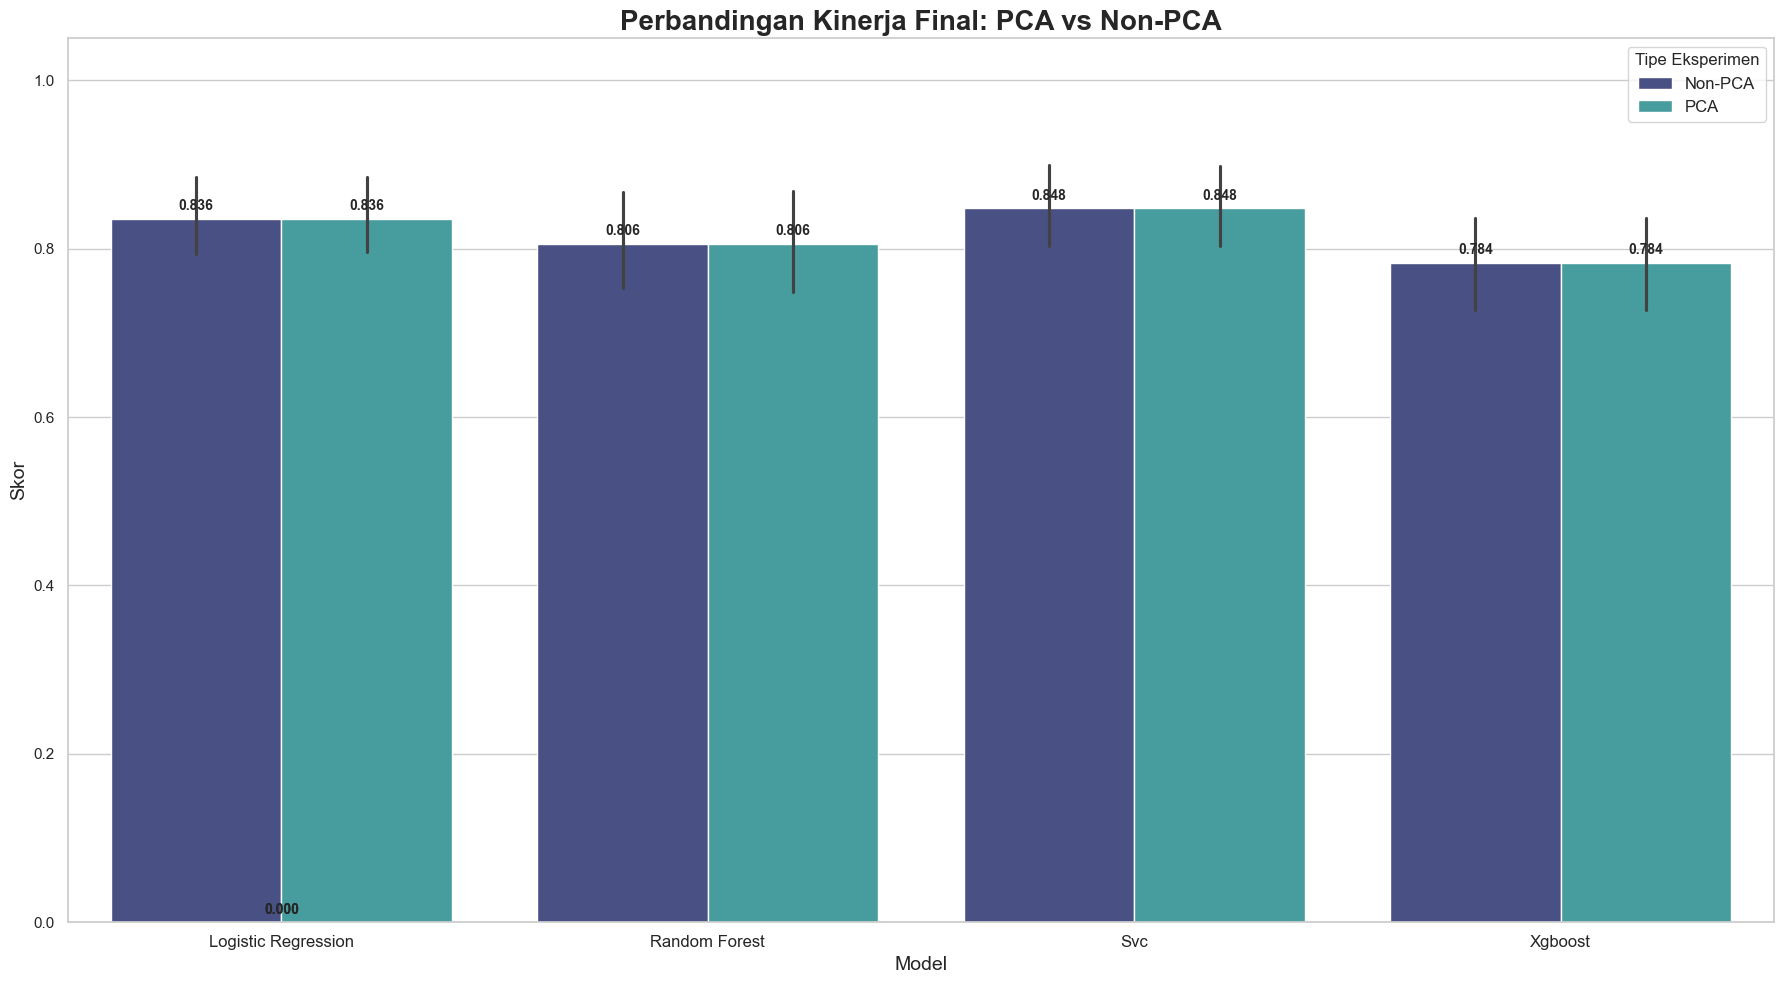

In [4]:
# Siapkan data untuk plotting
df_melted = df_performance.melt(id_vars=['Model', 'Tipe Eksperimen'], var_name='Metric', value_name='Score')

# Buat plot perbandingan akhir
plt.figure(figsize=(18, 10))
ax = sns.barplot(data=df_melted, x='Model', y='Score', hue='Tipe Eksperimen', palette='mako')

plt.title('Perbandingan Kinerja Final: PCA vs Non-PCA', fontsize=20, weight='bold')
plt.ylabel('Skor', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(ha='center', fontsize=12)
plt.ylim(0, 1.05)
plt.legend(title='Tipe Eksperimen', fontsize=12)

# Tambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# 🧠 5. Analisis Final & Rekomendasi "Sang Juara"

Berdasarkan tabel dan grafik di atas, kita bisa menarik kesimpulan akhir dan memberikan rekomendasi model mana yang paling cocok untuk dideploy atau dilaporkan.

In [5]:
# Urutkan berdasarkan F1-Score untuk menemukan kandidat terbaik
final_ranking = df_performance.sort_values(by='F1-Score', ascending=False)
best_model_info = final_ranking.iloc[0]

print("===== 🏆 Rekomendasi Model Juara 🏆 =====")
print("\nSetelah membandingkan semua hasil eksperimen, model dengan performa paling seimbang dan kuat adalah:")
print(f"\nModel: {best_model_info['Model']}")
print(f"Tipe: {best_model_info['Tipe Eksperimen']}")
print("-----------------------------------------")
print(f"F1-Score: {best_model_info['F1-Score']:.3f}  <-- Keseimbangan terbaik antara Precision & Recall")
print(f"Recall: {best_model_info['Recall']:.3f}    <-- Kemampuan mendeteksi kasus positif")
print(f"Precision: {best_model_info['Precision']:.3f} <-- Tingkat akurasi dari prediksi positif")
print(f"ROC-AUC: {best_model_info['ROC-AUC']:.3f}    <-- Kemampuan membedakan kelas secara umum")

print("\n--- Analisis & Saran ---")
print("Model ini direkomendasikan karena mencapai F1-Score tertinggi, yang menunjukkan keseimbangan paling optimal antara menekan 'false positive' (Precision) dan 'false negative' (Recall).")
print("Skor ROC-AUC yang tinggi juga mengkonfirmasi bahwa model ini memiliki daya pembeda yang sangat baik.")
print("\nLangkah Selanjutnya: Model .pkl yang sesuai dengan hasil ini siap untuk digunakan dalam tahap deployment atau presentasi akhir.")

===== 🏆 Rekomendasi Model Juara 🏆 =====

Setelah membandingkan semua hasil eksperimen, model dengan performa paling seimbang dan kuat adalah:

Model: Svc
Tipe: Non-PCA
-----------------------------------------
F1-Score: 0.818  <-- Keseimbangan terbaik antara Precision & Recall
Recall: 0.771    <-- Kemampuan mendeteksi kasus positif
Precision: 0.871 <-- Tingkat akurasi dari prediksi positif
ROC-AUC: 0.940    <-- Kemampuan membedakan kelas secara umum

--- Analisis & Saran ---
Model ini direkomendasikan karena mencapai F1-Score tertinggi, yang menunjukkan keseimbangan paling optimal antara menekan 'false positive' (Precision) dan 'false negative' (Recall).
Skor ROC-AUC yang tinggi juga mengkonfirmasi bahwa model ini memiliki daya pembeda yang sangat baik.

Langkah Selanjutnya: Model .pkl yang sesuai dengan hasil ini siap untuk digunakan dalam tahap deployment atau presentasi akhir.
